In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split

# Знакомство с данными

In [2]:
data= pd.read_csv('AB_NYC_2019.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.last_review=pd.to_datetime(data.last_review)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

id - уникальный идентификатор name - название объявление host_id - идентификатор хоста host_name - имя хоста neighbourhood_group - округ neighbourhood - район latitude и longitude - координаты квартиры room_type - тип сдаваемого помещения price - цена за помещение за сутки minimum_nights - минимальное количечство ночей на которое сдается помещение number_of_reviews - количество отзывов last_review - время последнего отзыва reviews_per_month - количество отзывов в месяц calculated_host_listings_count - количество объявлений хоста availability_365 - количество дней в году, когда объект доступен для бронирования

In [5]:
data.drop(['id','name','host_id','host_name'],axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data.sort_values(by='last_review',inplace=True)
data.number_of_reviews.fillna(0.0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 317 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     38843 non-null  datetime64[ns]
 9   reviews_per_month               38843 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  avail

In [9]:
data.reviews_per_month = data.reviews_per_month.astype('str')
data.reviews_per_month = data.reviews_per_month.apply(lambda x: '0.00' if x == 'nan' else x)
data.reviews_per_month = data.reviews_per_month.astype('float64')
data.info()


#функция fill nan меняет nanы

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 317 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     38843 non-null  datetime64[ns]
 9   reviews_per_month               48895 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  avail

# Визуализация и анализ данных

In [10]:
room_pivot = pd.pivot_table(data, 'price',['neighbourhood_group'],aggfunc=np.mean)
room_pivot

C:\Users\Виктория\AppData\Local\Temp\ipykernel_13052\553844302.py:1: FutureWarning: The provided callable <function mean at 0x0000029B590FFDC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  room_pivot = pd.pivot_table(data, 'price',['neighbourhood_group'],aggfunc=np.mean)


,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [11]:
agg_price = data.groupby('neighbourhood_group').agg({'price':'mean','number_of_reviews':'mean'}).reset_index()
agg_price

,neighbourhood_group,price,number_of_reviews
0,Bronx,87.496792,26.004583
1,Brooklyn,124.383207,24.202845
2,Manhattan,196.875814,20.985596
3,Queens,99.517649,27.700318
4,Staten Island,114.812332,30.941019


<Axes: xlabel='neighbourhood_group', ylabel='price'>

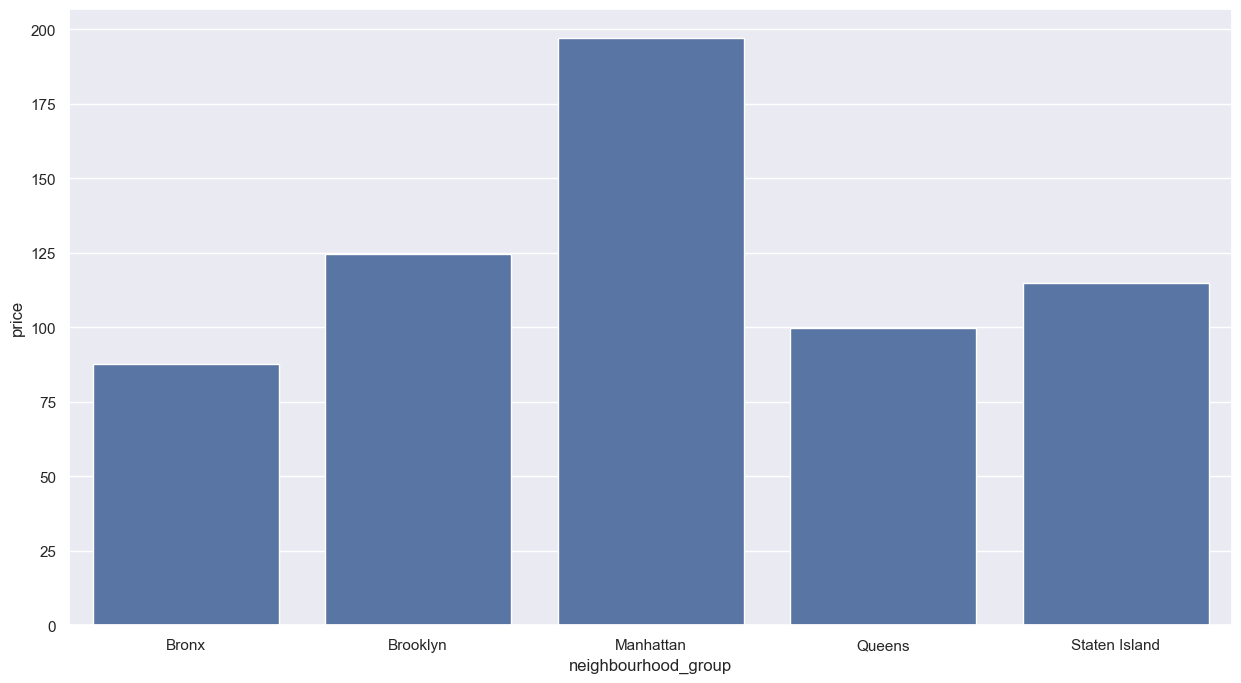

In [12]:
sns.barplot(data=agg_price, x='neighbourhood_group', y='price')

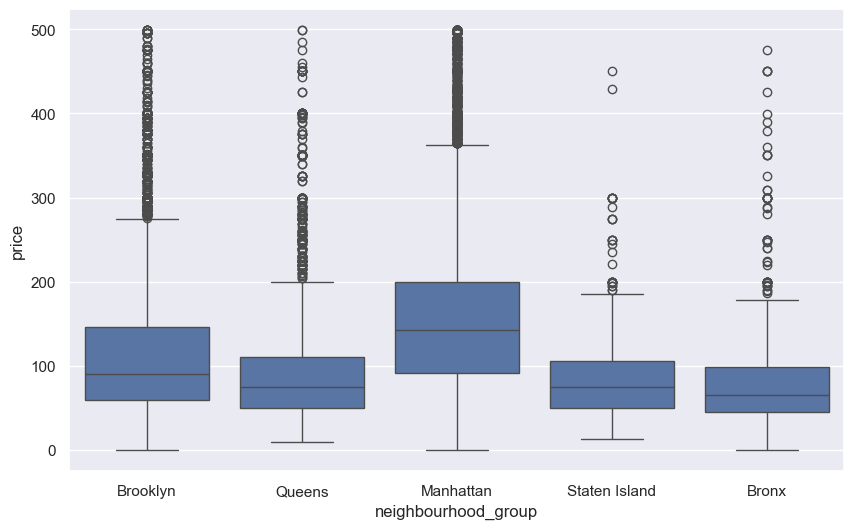

In [13]:
g = data[data.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x="neighbourhood_group",data =g);

In [14]:
map_ng_to_uniq_cnt = {}
for row in data.groupby('neighbourhood_group').agg({'neighbourhood':'nunique'}).reset_index().values:
    map_ng_to_uniq_cnt[row[0]]=row[1]
    
data['unique_neighbourhood_in_group']=data['neighbourhood_group'].map(map_ng_to_uniq_cnt)
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,unique_neighbourhood_in_group
317,Brooklyn,Greenpoint,40.72488,-73.95018,Private room,55,2,1,2011-03-28,0.01,1,0,47
163,Brooklyn,DUMBO,40.70207,-73.98571,Private room,250,3,14,2011-04-25,0.13,1,189,47
330,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60,47
125,Brooklyn,Williamsburg,40.71923,-73.96468,Private room,90,1,9,2011-09-18,0.08,1,245,47
143,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1,51


In [74]:
agg_price_by_roomtype = data.groupby('room_type').agg({'price':'mean'}).reset_index()
agg_price_by_roomtype

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


In [76]:
X = data.drop('price',axis=1)
Y = data['price']

In [80]:
X = pd.get_dummies(X, columns=['neighbourhood_group','room_type'],dtype= np.uint8);

In [81]:
X.head()

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,unique_neighbourhood_in_group,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
317,Greenpoint,40.72488,-73.95018,2,1,2011-03-28,0.01,1,0,47,0,1,0,0,0,0,1,0
163,DUMBO,40.70207,-73.98571,3,14,2011-04-25,0.13,1,189,47,0,1,0,0,0,0,1,0
330,Greenpoint,40.73842,-73.95312,3,2,2011-05-12,0.02,28,60,47,0,1,0,0,0,0,1,0
125,Williamsburg,40.71923,-73.96468,1,9,2011-09-18,0.08,1,245,47,0,1,0,0,0,0,1,0
143,Flushing,40.74028,-73.83168,2,1,2011-09-19,0.01,1,1,51,0,0,0,1,0,0,1,0


In [83]:
le = LabelEncoder()
X['neighbourhood']=le.fit_transform(X['neighbourhood'])
X.drop('last_review',axis=1,inplace=True)
X.head()

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,unique_neighbourhood_in_group,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
317,91,40.72488,-73.95018,2,1,0.01,1,0,47,0,1,0,0,0,0,1,0
163,53,40.70207,-73.98571,3,14,0.13,1,189,47,0,1,0,0,0,0,1,0
330,91,40.73842,-73.95312,3,2,0.02,28,60,47,0,1,0,0,0,0,1,0
125,214,40.71923,-73.96468,1,9,0.08,1,245,47,0,1,0,0,0,0,1,0
143,77,40.74028,-73.83168,2,1,0.01,1,1,51,0,0,0,1,0,0,1,0


In [86]:
scaler = MinMaxScaler()
scaledX = scaler.fit_transform(X)
scaledX

array([[0.41363636, 0.54465604, 0.55367593, ..., 0.        , 1.        ,
        0.        ],
       [0.24090909, 0.48946209, 0.48681858, ..., 0.        , 1.        ,
        0.        ],
       [0.41363636, 0.57741912, 0.54814369, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.42727273, 0.76211678, 0.55651732, ..., 1.        , 0.        ,
        0.        ],
       [0.43181818, 0.62361168, 0.4766385 , ..., 0.        , 0.        ,
        1.        ],
       [0.43181818, 0.63941249, 0.48000677, ..., 0.        , 1.        ,
        0.        ]])

# Построение модели

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42);

In [89]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [93]:
Y_pred = model.predict(X_test)

mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 49346.158589066414
R^2 0.11077969974889657
RMSE 222.13995270789633


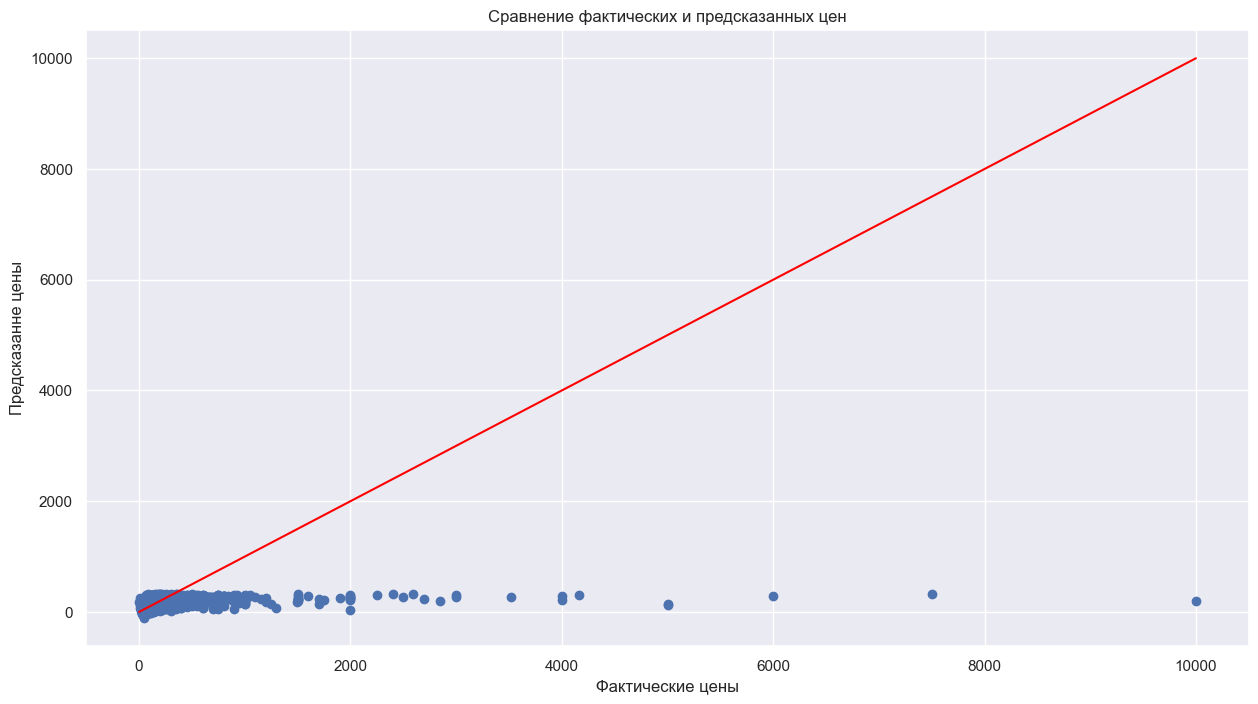

In [94]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Фактические цены')
plt.ylabel('Предсказанне цены')
plt.title('Сравнение фактических и предсказанных цен')
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.show()

In [95]:
model = Ridge(alpha=1)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 49346.158589066414
R^2 0.11077969974889657
RMSE 222.13995270789633


In [96]:
model = Lasso(alpha=0.3)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 49346.158589066414
R^2 0.11077969974889657
RMSE 222.13995270789633


In [101]:
model = SGDRegressor(l1_ratio=0.5, loss = 'squared_epsilon_insensitive',max_iter=2000,learning_rate='adaptive')
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 49346.158589066414
R^2 0.11077969974889657
RMSE 222.13995270789633


In [102]:
model.coef_

array([-5.43089624e+06, -9.61352723e+10, -5.23259481e+10, -7.73471399e+06,
       -3.33523247e+06,  6.33231445e+07, -1.33761772e+07, -1.49019846e+06,
        8.38329631e+08,  2.94834601e+10,  1.04714995e+09,  2.03407883e+10,
        5.78559767e+09, -5.60361514e+10, -1.21396672e+09, -1.17859585e+08,
        1.95267095e+09])

In [105]:
feature_score = {}

for fname, score in zip(X.columns, model.coef_):
    feature_score[fname]= round(score/10000000,2)
    
    
top_features = {k:v for k,v in feature_score.items() if v>0}
top_features

{'reviews_per_month': 6.33,
 'unique_neighbourhood_in_group': 83.83,
 'neighbourhood_group_Bronx': 2948.35,
 'neighbourhood_group_Brooklyn': 104.71,
 'neighbourhood_group_Manhattan': 2034.08,
 'neighbourhood_group_Queens': 578.56,
 'room_type_Shared room': 195.27}